<a href="https://colab.research.google.com/github/Akutagawa50/Google_Colaboratory/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0～9の手書き文字の認識（識別）

ライブラリをインポート

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix

digits = load_digits()

digitsの要素を確認

In [3]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

説明を表示

In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

データの大きさを確認

In [5]:
digits.data.shape

(1797, 64)

イメージデータの大きさを確認

In [6]:
digits.images.shape

(1797, 8, 8)

1つ目のイメージの中身を確認
各要素の数値はその座標の明るさ(0～15)で表される

In [7]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

データをプロット

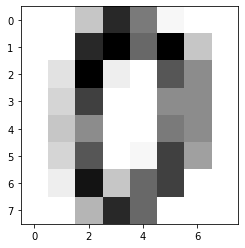

In [8]:
plt.imshow(digits.images[0], cmap='Greys')

データの要素を表示

In [9]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
データセットから訓練用データとテスト用データをランダムに抽出
random_stateはシード値

In [12]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 1/3, random_state = 1)

学習前の初期設定 \
隠れ層 50\
活性化関数 シグモイド関数\
ソルバ 確率的勾配降下法\
学習率 0.001

In [16]:
clf = MLPClassifier(hidden_layer_sizes=50, activation='logistic', solver='sgd', learning_rate_init=0.001)

学習

In [17]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


出力器の活性化関数を確認

In [18]:
clf.out_activation_

'softmax'

In [ ]:
認識率を表示

In [19]:
clf.score(X_test, y_test)

0.9415692821368948

# 土地の価格の予想（回帰）

ライブラリをインポート

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

boston = load_boston()

各要素を表示
* bostonの要素
* bostonの説明
* データを5個表示
* 教師データを5個表示
* 特徴の名前を表示
* データ配列の大きさを表示
* 価格と各特徴の散布図を表示


In [22]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [23]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [24]:
boston.data[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [25]:
boston.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [26]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [27]:
boston.data.shape

(506, 13)

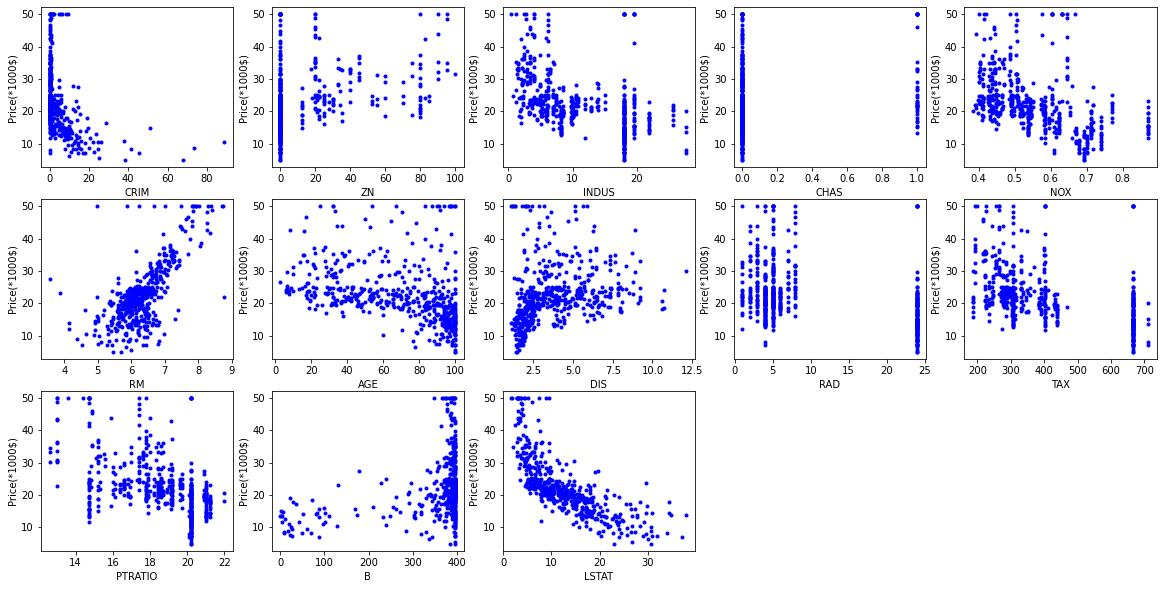

In [28]:
plt.figure(figsize=(20.0, 10.0))
for i in range(len(boston.feature_names)):
    plt.subplot(3, 5, i+1)
    plt.xlabel(boston.feature_names[i])
    plt.ylabel("Price(*1000$)")
    plt.scatter(boston.data[:,i], boston.target, color='b', marker='.')

訓練用とテスト用のデータをランダムに抽出

In [30]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = 1/4, random_state = 0)

学習

In [31]:
reg = MLPRegressor(hidden_layer_sizes=1000, random_state = 0)

In [32]:
reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=1000, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=0, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

決定係数を表示\
関数の正確さを表す\
$0\leqq R^2 \leqq 1$\
1に近いほど良い関数

In [33]:
reg.score(X_test, y_test)

0.6185876511388242

# ハイパーパラメータ

ライブラリをインポート

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

digits = load_digits()
X = digits.data
y = digits.target

学習率を$10^{-6}$から$10^1$まで$10$倍ずつ変化させたときの認識率

Text(0, 0.5, 'accuracy(%)')

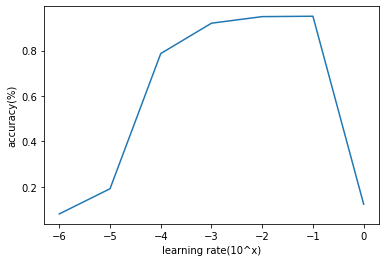

In [37]:
scores = []
for i in range(-6, 1):
    clf = MLPClassifier(hidden_layer_sizes=100, activation='logistic',
    solver='sgd',learning_rate_init=10**(i))
    clf.fit(X, y)
    scores.append(cross_val_score(clf, X, y, cv=3).mean())
x = np.arange(-6,1,1)
plt.plot(x, scores)
plt.xlabel("learning rate(10^x)")
plt.ylabel("accuracy(%)")

学習率は$10^{-3}$から$10^{-1}$が良い

# 過学習

ライブラリをインポート

In [38]:
from numpy import random
import matplotlib.pyplot as plt
import numpy as np

誤差を持つ3次関数上の点をプロット

   3     2
1 x - 6 x + 11 x - 6


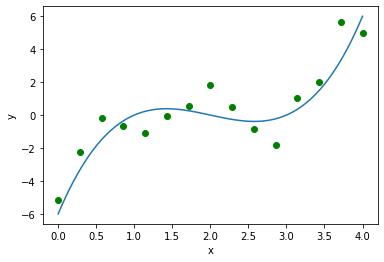

In [39]:
a = 1.0
b = 2.0
c = 3.0

target_min = 0.0
target_max = 4.0

f = np.poly1d([a, b, c], True)
x = np.linspace(target_min, target_max, int(target_max-target_min)*20)

print(f)
plt.plot(x,f(x))

ave = 0.0
sd = 1.0
data_N = 15

y=[]
data_x = np.linspace(target_min, target_max, data_N)
for i in range(len(f(data_x))):
    y.append(f(data_x)[i] + random.normal(loc=0.0, scale=1.0))

plt.xlabel("x")
plt.ylabel("y")
plt.plot(data_x, y, 'go');

近似する関数の次元を変えてプロット

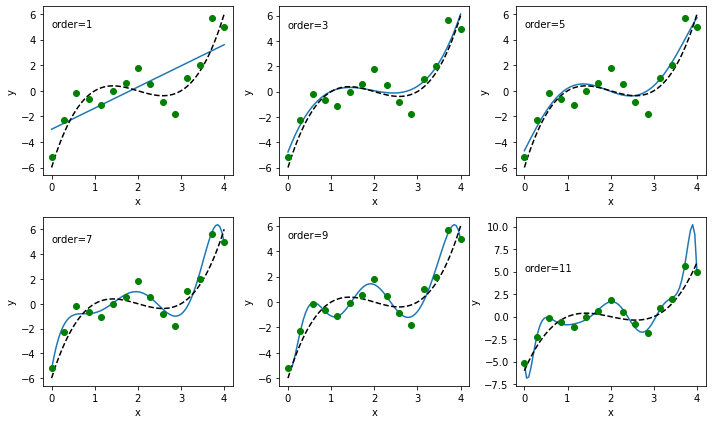

In [40]:
count = 1
plt.figure(figsize=(10.0, 6.0))
for order in range(1, 12, 2):
    estimated_parameters = np.polyfit(data_x, y, order)
    estimated_curve = np.poly1d(estimated_parameters)
    plt.subplot(2,3,count)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(x, estimated_curve(x))
    plt.plot(x,f(x),linestyle='dashed', color='black')
    plt.plot(data_x, y, 'go')
    plt.text(0, 5, "order="+str(order))
    count += 1
plt.tight_layout()
plt.show;